# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We Team GM3, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id = 'Overview'></a><br>
### Predict Overview: EDSA Movie Recommendation 2022
[Back to table of Contents](#Table_Contents)

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

Like many machine learning techniques, a recommender system makes prediction based on users' historical behaviors. Specifically, it's to predict user preference for a set of items based on past experience. To build a recommender system, the most two popular approaches are Content-based and Collaborative Filtering. 
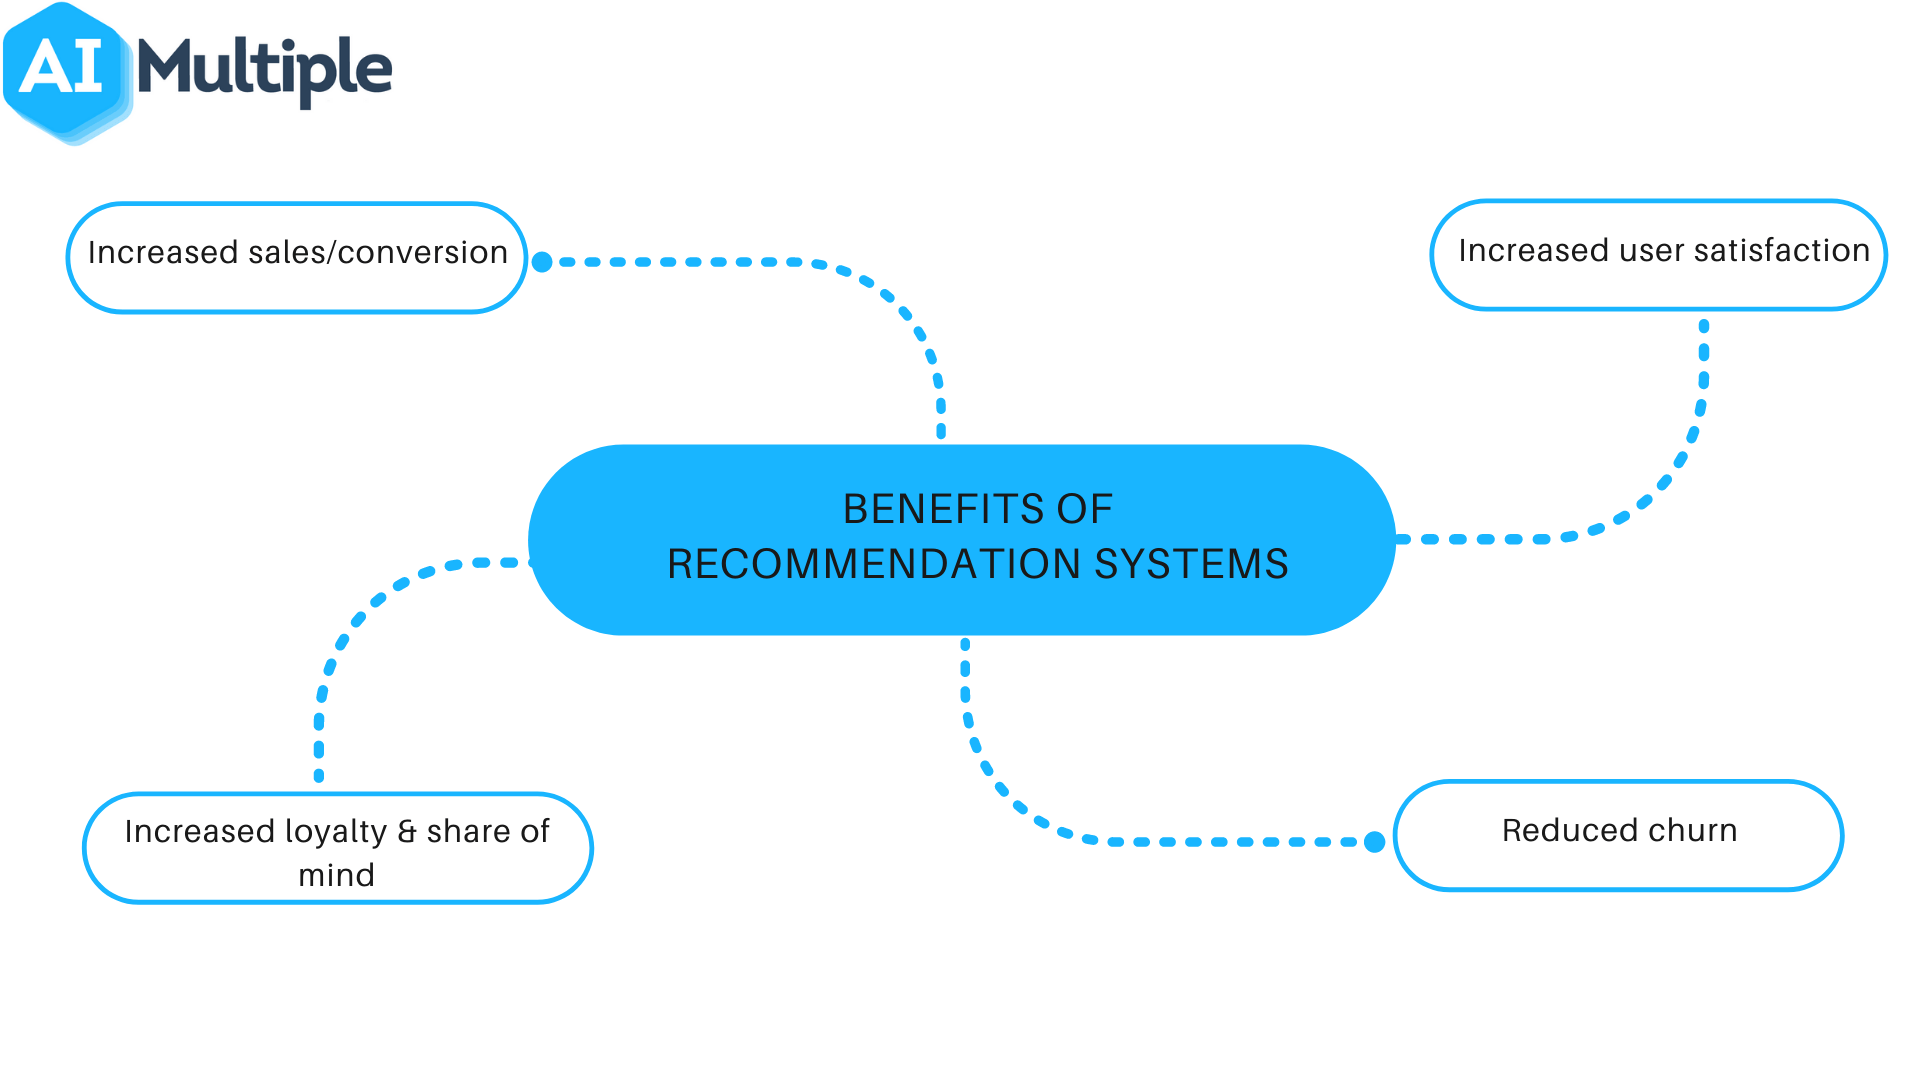


<a id='Table_Contents'></a><br>
## Table of Contents

1. [Predict Overview: EDSA Movie Recommendation 2022](#Overview)


2. [Imports and Data](#imports_data)
 * Comet
 * Importing libraries
 * Loading Data
 * Anaylsing The Data Structure
 * Searching for Duplicate Rows in Dataset
 * Searching for NaN Values in the Dataset
 

3. [Exploratory Data Analysis](#EDA_raw)
 * Train Dataset
 * Movies Dataset
 * Tags Dataset
 * Links Dataset
 * Combined Dataset for Further Analysis
 * Sex and Animation
 

4. [Recommender Systems](#Recommend)
 * What is a Recommender System
 * Types of Recommender Systems
 * Content Based
 * Collabrotive Based 
 
 
<a href=#seven>5. Data Engineering</a>

6. [Collaborative Based Filtering](#Collab)
 * Data Preprocessing
 * Predicting Ratings
 * Evaluation 
 * Recommender Similar Movies Based on Movie Choice

7. [Content Based Filtering](#Content)
 * Data Preprocessing
 * Predicting Ratings
 * Evaluation 
 * Recommender Similar Movies Based on Movie Choice
 
8. [Big Data](#Big_data)
 * Trial and Error
 * SVD
 * ALS

9. [Conclusion](#con)

<a id = 'imports_data'></a><br>
## 2. Imports and Data

[Back to table of Contents](#Table_Contents)
---  
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

<a id="comet"></a>
# Starting a Comet experiment
<img src="https://www.comet.ml/images/logo_comet_light.png" width="350" alt="Drawing" style="width: 350px;"/>
We will be using Comet as a form of version control throughout the development of our model

In [1]:
# Import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="clnZaB7dekcoJY7FUNcktpBAZ",
    project_name="unsupervised-learning-gm3",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/will-i-am18/unsupervised-learning-gm3/6e96b667ee54460fa0538b53d878ec23



# Import necessary libraries

This notebook requires some packages that may not be installed on your local machine. Below we provide a list of packages to be installed (if they are not yet installed) as well as the code to install them.  

Run the following commands within Git bash (Windows), terminal (Mac/Linux):  

- Comet_ml - `pip install comet_ml==3.1.9`    
- flowtensor - `pip install tensorflow==2.9.1`  
- pyspark - `pip install pyspark==3.3.0`  
- Pyspellchecker - `pip install pyspellchecker==0.5.4`  
- Ftfy - `pip install ftfy==5.7`  
- surprise - `pip install surprise == 1.1.0`

In [2]:
# import comet_ml in the top of your file
from comet_ml import Experiment

# import comet_ml in the top of your file
from comet_ml.api import API, APIExperiment

#Inspecting
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from functools import reduce

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
large = 22; med = 16; small = 12
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)
from wordcloud import WordCloud
from PIL import Image
import collections
from matplotlib import style
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize': [16, 12]})

#images
from IPython.display import Image
from IPython.core.display import HTML 

# Shrinking Data
from sklearn.utils import shuffle
from collections import Counter

#Recommendation
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from fuzzywuzzy import fuzz 
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, linear_kernel


#Cleaning
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import random
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer


#vectorize
from sklearn.feature_extraction.text import TfidfVectorizer

#Surprise Package to predict with colaborative filtering
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV, cross_validate
from surprise import Reader, Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import LeaveOneOut

#Big Data modelling
import findspark
findspark.init()
import pyspark.sql.functions as sql_func
from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS, ALSModel
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql import SparkSession
from pyspark.ml.feature import CountVectorizer, IDF
from pyspark.ml.regression import LinearRegression
spark = SparkSession.builder.appName('recommender').getOrCreate()

#save model
import pickle

C:\Users\Aphiwe Rasisemula\AppData\Local\Temp\ipykernel_17800\3455581934.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Loading Data

In [3]:
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

## Analysing The Data Structure

In [4]:
#Train dataset
print(train.describe())

             userId       movieId        rating     timestamp
count  1.000004e+07  1.000004e+07  1.000004e+07  1.000004e+07
mean   8.119909e+04  2.138911e+04  3.533395e+00  1.215677e+09
std    4.679359e+04  3.919578e+04  1.061124e+00  2.268921e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.197000e+03  3.000000e+00  1.011742e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.199019e+09
75%    1.215790e+05  8.630000e+03  4.000000e+00  1.447242e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


In [5]:
#Genome Scores 
print(genome_scores.describe())

            movieId         tagId     relevance
count  1.558445e+07  1.558445e+07  1.558445e+07
mean   4.602249e+04  5.645000e+02  1.163679e-01
std    5.535221e+04  3.256254e+02  1.544722e-01
min    1.000000e+00  1.000000e+00  2.500000e-04
25%    3.853750e+03  2.827500e+02  2.400000e-02
50%    8.575500e+03  5.645000e+02  5.650000e-02
75%    8.018650e+04  8.462500e+02  1.407500e-01
max    2.064990e+05  1.128000e+03  1.000000e+00


In [6]:
# Genome Tags
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [7]:
# Tags
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [8]:
# IMDB Dataset
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [9]:
# Links Dataset
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [10]:
# Movies Dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## Searching for Duplicate Rows 

In [11]:
#Check for duplicates
duplicate_rows_train = train.duplicated().sum()
duplicate_rows_test = test.duplicated().sum()
duplicate_rows_genome_scores = genome_scores.duplicated().sum()
duplicate_rows_tags = tags.duplicated().sum()
duplicate_rows_links = links.duplicated().sum()
duplicate_rows_movies = movies.duplicated().sum()

print('There are ',duplicate_rows_train,' duplicated rows for the training set')
print('There are ',duplicate_rows_test,' duplicated rows for the test set')
print('There are ',duplicate_rows_genome_scores,' duplicated rows for the genome scores set')
print('There are ',duplicate_rows_tags,' duplicated rows for the tags set')
print('There are ',duplicate_rows_links,' duplicated rows for the links set')
print('There are ',duplicate_rows_movies,' duplicated rows for the movies set')

There are  0  duplicated rows for the training set
There are  0  duplicated rows for the test set
There are  0  duplicated rows for the genome scores set
There are  0  duplicated rows for the tags set
There are  0  duplicated rows for the links set
There are  0  duplicated rows for the movies set


From analysing the structure and missing values of each dataframe, the data that won't be analysed in the EDA is the genome tags as 1128 observations is very little variance compared to the data that is being used in the training the set or other data being analysed.

## Searching for NaN values in datasets

In [12]:
# Train Dataset
print(train.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [13]:
# Test Dataset
print(train.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [14]:
# Genome Scores 
print(genome_scores.isna().sum())

movieId      0
tagId        0
relevance    0
dtype: int64


In [15]:
# Genome Tags
print(genome_tags.isna().sum())

tagId    0
tag      0
dtype: int64


In [16]:
# Imbd Data
print(imdb.isna().sum())

movieId          0    
title_cast       10068
director         9874 
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


In [17]:
# Imbd Data
print(imdb.isna().sum())

movieId          0    
title_cast       10068
director         9874 
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


In [18]:
# Links Dataset
print(links.isna().sum())

movieId    0  
imdbId     0  
tmdbId     107
dtype: int64


In [19]:
# Movies Dataset
print(movies.isna().sum())

movieId    0
title      0
genres     0
dtype: int64


In [20]:
# Tags Dataset
print(tags.isna().sum())

userId       0 
movieId      0 
tag          16
timestamp    0 
dtype: int64


In [21]:
#Remove NaN values from the datasets being analysed
tags = tags.dropna()
links = links.dropna()

<a id = 'EDA_raw'></a><br>
# 3. Exploratory Data Analysis
[Back to Table of Contents](#Table_Contents)

## Train Dataset

In [22]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The train dataframe has 4 columns.

- userId - Every user is represented by an unique Id.
- movieId - Every movie is represented by an uniue Id.
- rating - Represents the rating given by the user to the corresponding movie.
- timestamp - The time at which the rating was recorded.

In [23]:
train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


Some insights that can be drawn: <br>
<br>
The users have userId's in the range 1 - 16254 <br>
The minmum rating given to the movie is 0,5 whereas the maximum rating given to the movies is 5.0 <br>
The average rating that is the mean ratings given by the users to all the movies is 3.5 <br>
The movies have movieId's in the range 1 - 209171.( Note that 193609 is the highest movieId and not total number of movies.)

In [24]:
# Unique ratings
uniq_rating = train['rating'].unique()
uniq_rating = list(uniq_rating)
uniq_rating =  sorted(uniq_rating)
uniq_rating

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

There are 10 categories of ratings that the users could have chosen from to rate the movie. Lets look at the distributions of each rating.

### Ratings Histogram

Text(0.5, 1.0, 'Number of ratings for all users')

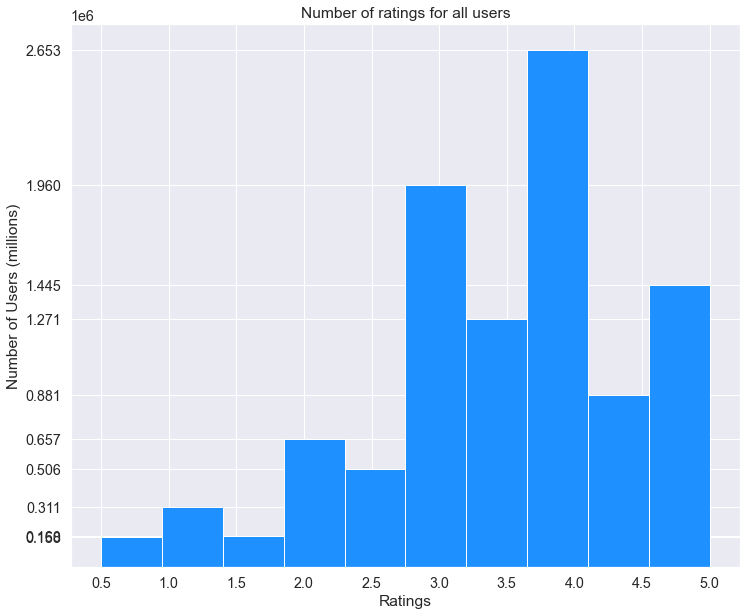

In [25]:
#groupby
df_ratings = train.groupby('rating').count()
ylims = df_ratings['userId'].values.tolist()

#Plot
fig, ax = plt.subplots(figsize = (12,10))
ax = train['rating'].plot(kind='hist', x = uniq_rating, xticks=uniq_rating, yticks = ylims,  color = 'dodgerblue')
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Users (millions)')
ax.set_title('Number of ratings for all users')

Most of the users have given a rating of 4.0 which is almost one third of total ratings given by the users. The distributions are skewed left, the mean is smaller than the median.<br> The histogram shows that majority of the users rated movies between 2.5 - 5 stars.

## Movies Dataset

In [26]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The movies dataframe has 3 columns.

- movieId - Every movie is represented by an uniue Id.
- title - Represents the movie title for the given movieId
- genres - The genres belonging to each movie.


Now, looking at the ‘genre’ column in movie dataset, we find that genre is string type and separated by ’|’. So, here we will convert it into list of genre and separate it genre-wise and keep it new column ‘Genre_Cat’.

In [27]:
# Creating a new column 'Genre_Cat'
movies['Genre_Cat'] = movies['genres'].str.split('|')
movies.head()

,movieId,title,genres,Genre_Cat
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [28]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in movies['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [29]:
#Checking and counting the genres in the dataset
genres

{'Adventure': 4145,
 'Animation': 2929,
 'Children': 2935,
 'Comedy': 16870,
 'Fantasy': 2731,
 'Romance': 7719,
 'Drama': 25606,
 'Action': 7348,
 'Crime': 5319,
 'Thriller': 8654,
 'Horror': 5989,
 'Mystery': 2925,
 'Sci-Fi': 3595,
 'IMAX': 195,
 'Documentary': 5605,
 'War': 1874,
 'Musical': 1054,
 'Western': 1399,
 'Film-Noir': 353,
 '(no genres listed)': 5062}

Now lets visualize this information using a pie chart

### Genres Pie Chart

In [30]:
#Counting each genre
genre_counter = {}
for index,row in movies.iterrows():
    for genre in row['Genre_Cat']:
        genre_counter[genre] = genre_counter.get(genre,0) +1

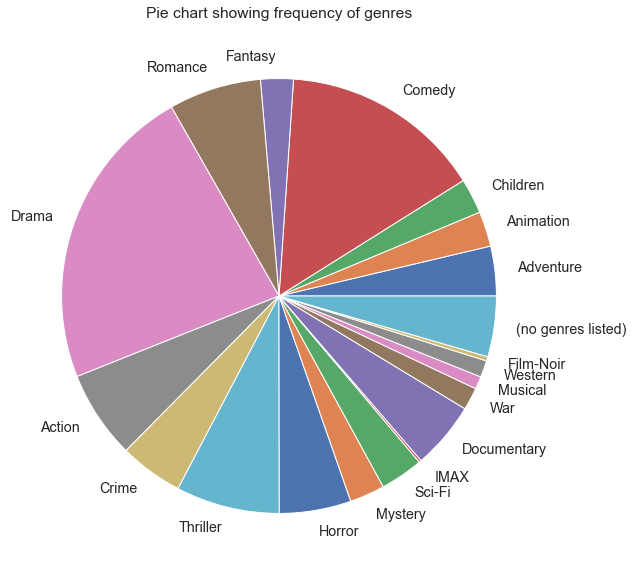

In [31]:
#Plot pie chart of genres
plt.figure(figsize = (12, 10))
plt.pie(list(genre_counter.values()),labels = genre_counter.keys())
plt.title('Pie chart showing frequency of genres')
plt.show()

### Genres Word Cloud

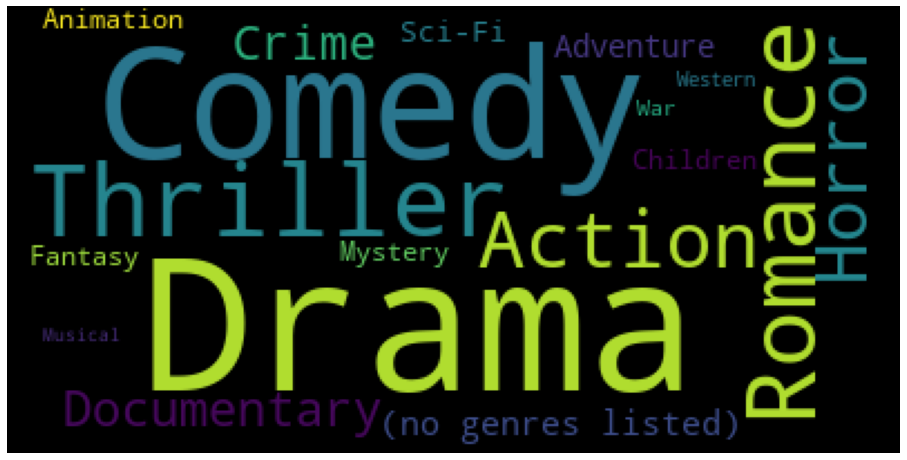

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, height=200, background_color = 'black', min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Insights: <br>

We can see from the pie chart as well as the world cloud that the most common genres are Drama, Comedy and Romance

## Tags Dataset

In [33]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In the tags we have a column 'tag' which are words that are used to decribe the movie

### Tags Word Cloud

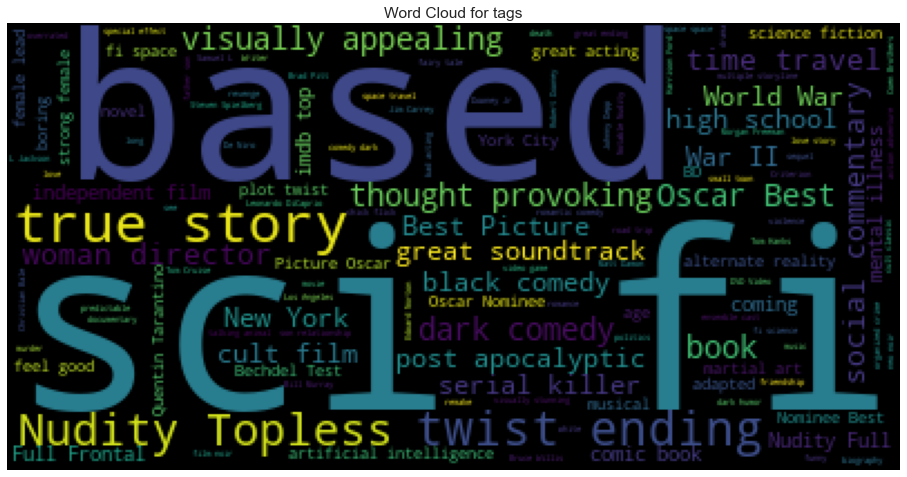

In [34]:
#Create WordCloud Plot
tag_words =' '.join([text for text in tags['tag']])
wordcloud = WordCloud(width=400, height=200, random_state=21, max_font_size=250, background_color='black').generate(tag_words)

plt.title("Word Cloud for tags")
plt.imshow(wordcloud)
plt.axis('off')
sns.set(style="darkgrid")
sns.set_style('dark')
plt.show()

<p> The WordCloud shows the most spoken topics by increasing the size of those words, from this we can see 'Nudity Topless', 'twist ending','based on','true story', 'Oscar Best', 'sci fi' are the tags that are shown the most based on users descriptions. <br> Therefore I suspect that the movies rated the highest will have these aspects incorporated into the movie. Seems that movies based on a true story or science fiction appeared the most from  all the movies described.</p>

## Links Dataset

In [35]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [36]:
links.describe()

,movieId,imdbId,tmdbId
count,62316.000000,6.231600e+04,62316.000000
mean,122292.898774,1.457104e+06,155186.689999
std,63261.366338,2.098625e+06,153362.694700
min,1.000000,1.000000e+00,2.000000
25%,82233.000000,8.161050e+04,36768.750000
50%,138139.000000,3.256680e+05,86750.500000
75%,173267.500000,2.064717e+06,255255.250000
max,209171.000000,1.117094e+07,646282.000000


## Imdb Dataset

This shows that this dataframe does not have any valuable data, this table is used to connect the imdb data and tmdb data, so it will not be used in the recommendation algorithm.

In [37]:
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betrayal|mother son relationship
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [38]:
imdb.shape

(27278, 6)

The imdb data dataframe has 6 columns.

- movieId - Every movie is represented by an uniue Id.
- title_cast - The names of the cast members.
- director - The name of the director for each movie.
- budget - The budget for each movie.
- runtime - The runtime for each movie.
- plot_keywords - Keywords of the plot for each movie.

### Title Cast

37% of the 'title_cast' column has missing data. This column contains the names of the actors and actresses of the respective movies. As such, the only way to impute the missing data would be to manually search for and add the cast members, which would be very labour intensive. 37% is a great proportion of the data, thus dropping rows containing missig values is a bad idea. Therefore we simply impute missing data with empty strings. 

We foresee this operation being done several times over, thus we will create a function for replacing missing values with empty strings.

In [39]:
def empty_strings(df, col):
    df = df.copy()
    df[col].fillna(value='',inplace=True)
    return df

In [40]:
imdb = empty_strings(imdb,'title_cast')

In [41]:
# Drop nulls for analysis
df_nonulls = imdb.dropna()

### Directors Word Cloud

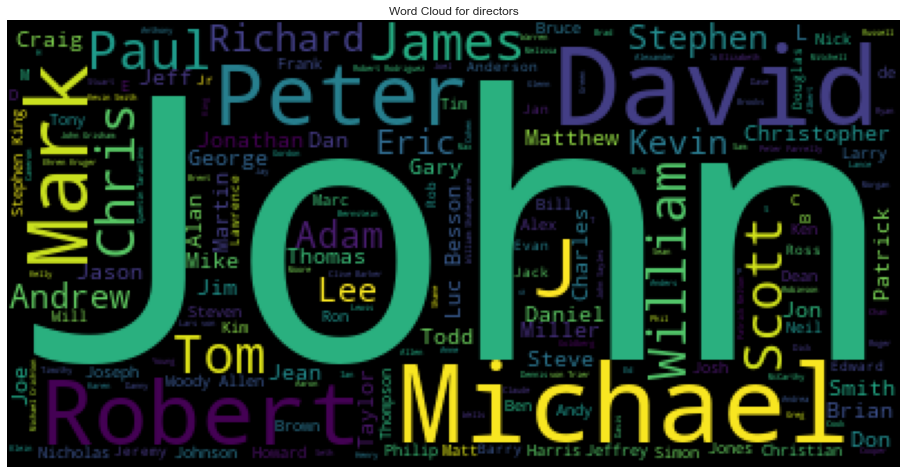

In [42]:
#Create WordCloud Plot
tag_words =' '.join([text for text in df_nonulls['director']])
wordcloud = WordCloud(width=400, height=200, random_state=21, max_font_size=200, background_color='black').generate(tag_words)

plt.title("Word Cloud for directors")
plt.imshow(wordcloud)
plt.axis('off')
sns.set(style="darkgrid")
sns.set_style('dark')
plt.show()

### Directors bar graph

<p> The word Cloud is not grouping the names and surnames together so a bar will show the top directors in a better representation.</p>

<AxesSubplot:title={'center':'Distribution of top Directors'}, xlabel='director'>

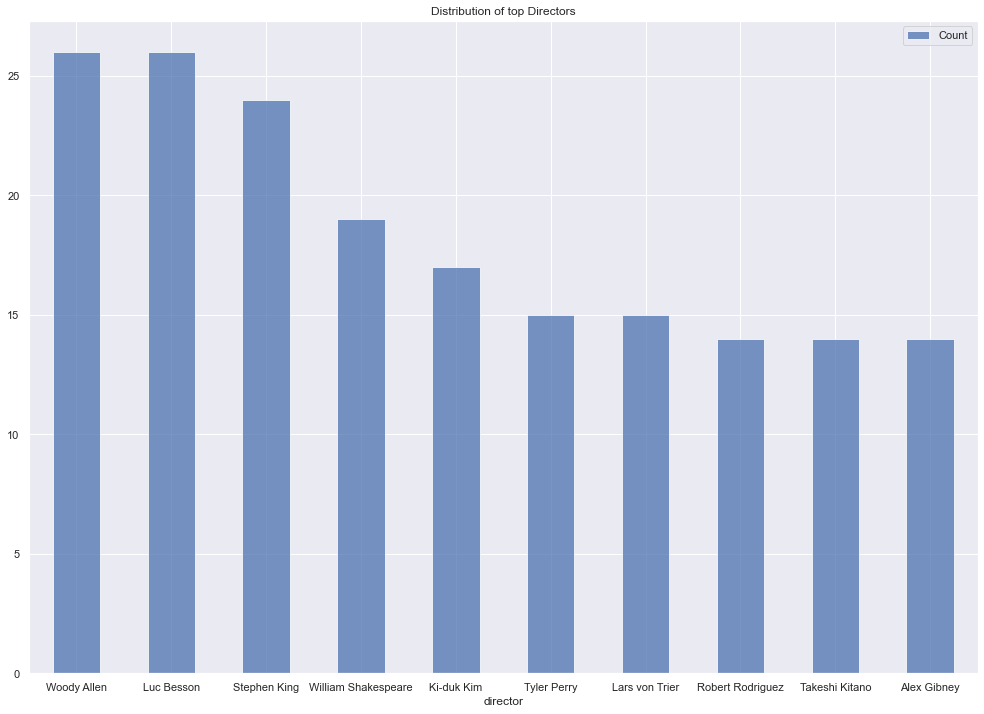

In [43]:
director_count_df = imdb.groupby(['director']).count()
director_count_df.drop(['title_cast','runtime','budget','plot_keywords'], axis=1, inplace=True)
director_count_df.rename(columns  = {'movieId':'Count'}, inplace=True)
director_count_df.sort_values(['Count'], ascending = False, inplace=True)
director_count_df = director_count_df.iloc[1:,:]
director_count_df.reset_index(inplace = True)
director_count_df.iloc[:10,:].plot(kind = 'bar', x = 'director', y = 'Count', title = 'Distribution of top Directors', 
                   figsize = (17,12), alpha=0.75, rot=0, grid = True, legend = True)

#### Budget

Dropping 71% of the data in the IMBD DataFrame is a bad idea, much like filling in missing budget data with 0. The budget of a movie, we intuitively assume, may be a great predictor of the quality of the movie and therefore a good predictor of whether someone may enjoy watching the movie, so we would like to keep budget as a feature. Let's do some investigating to decide on an approach to filling the missing budget data.

In [44]:
type(imdb['budget'][0])

str

In [45]:
imdb['budget'] = imdb['budget'].astype(str)

We must first convert the data type of the budget data to numbers for it to be of use in a model.

In [46]:
str_budget = []
for row in imdb['budget']:
    for string in row:
        if string[0]=='$':
            str_budget.append(row[1:])
            
budget = []
for number in str_budget:
    budget.append( int( number.replace(',','') ) )
imdb['budget'] = pd.Series(budget)

In [47]:
imdb['budget'] = imdb['budget'].astype(float)

Now that the 'budget' column contains only numbers, let's get back to filling in the missing data.

<AxesSubplot:>

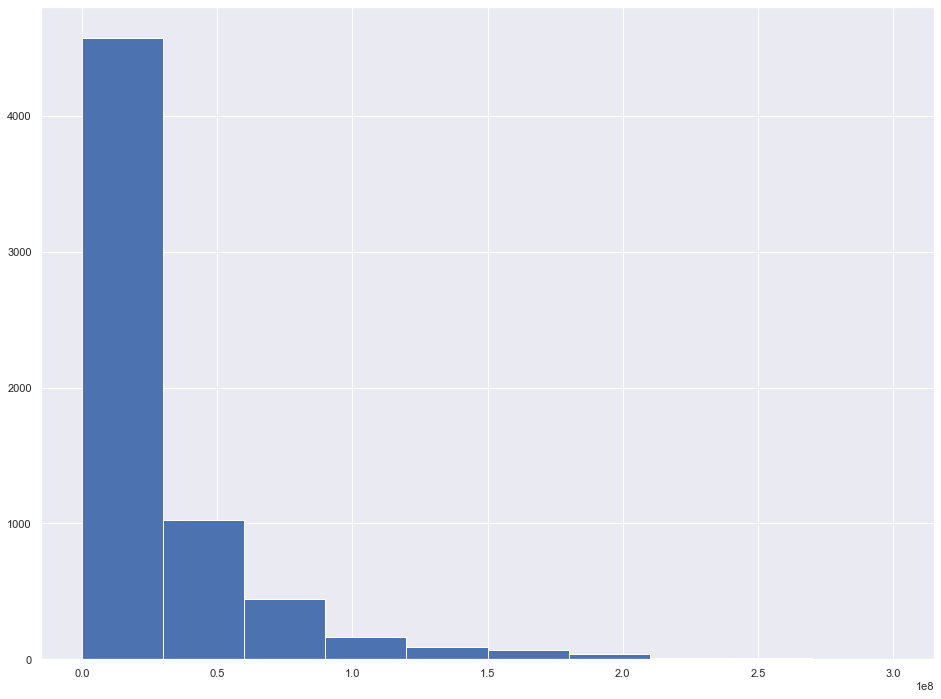

In [48]:
imdb['budget'].hist()

In [49]:
imdb['budget'].min()

0.0

In [50]:
imdb[imdb['budget']==0]

,movieId,title_cast,director,runtime,budget,plot_keywords
6161,6260,,NaN,NaN,0.0,NaN


There is one movie with a budget of $0, which is no doubt not possible. The same data entry is missing other data too, so we will drop it.

In [51]:
imdb.drop(6161,axis=0,inplace=True)

In [52]:
imdb['budget'].describe()

count    6.425000e+03
mean     2.574886e+07
std      3.510803e+07
min      4.000000e+00
25%      3.500000e+06
50%      1.300000e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [53]:
imdb['budget'].value_counts().head()

10000000.0    232
5000000.0     231
20000000.0    227
30000000.0    208
15000000.0    194
Name: budget, dtype: int64

Looking at the distribution of movie budgets, no ideas come to mind on how to deal with the missing budget data. The budget of a movie, we believe, must be a great contributer to the quality of the movie, thus we do not want to falsely attribute a high budget to a low budget movie or a low budget to a hight budget movie, as this will take away from the predictive value of the movie budget as a whole. We are better off dropping the budget column.

### Directors that have the highest runtime

In [54]:
# Top ten highest runtime 
imdb[imdb['runtime'].notnull()][['runtime', 'director','plot_keywords']].sort_values('runtime', ascending = False).head(10)

,runtime,director,plot_keywords
25918,877.0,Dakota Fanning,roswell new mexico|unidentified flying object|unidentified flying object crash|alien
18779,750.0,Sergey Bezrukov,gangster romanticization|criminal|homicide|murder
19557,644.0,Paul Joyce,filmmaker
20823,629.0,David Rudolf,columnist|blowpoke|blood|staircase
21032,600.0,David Ogden Stiers,big city life|new york city|urban setting|skyscraper
7356,594.0,Damian Lewis,airborne troops|american abroad|u.s. soldier|american soldier
9176,561.0,Kirsten Rolffes,doctor|hospital|denmark|dishwasher
7357,561.0,Kirsten Rolffes,doctor|hospital|denmark|dishwasher
13093,552.0,Irene Bedard,american indian|native american|cheyenne territory|cheyenne indian
21043,551.0,NaN,NaN


We can see that the director with the highest runtime is Dakota Fanning

In [55]:
Average_runtime = imdb['runtime'].mean()
print('The average runtime of all the movies is', Average_runtime)

The average runtime of all the movies is 100.31233129238265


### Anaylsing plot keywords

In [56]:
# Create a function to find plot keywords in the dataset

keywords = {} # create a dictionary to store different keyword values

def find_keywords():
    for keyword in df_nonulls['plot_keywords']:
        words = keyword.split('|')
        for word in words:
            keywords[word] = keywords.get(word, 0) + 1
            
find_keywords()

In [57]:
# Sorting dictionary in descending order
{k: v for k, v in sorted(keywords.items(), key=lambda item: item[1], reverse = True)}

{'female nudity': 137,
 'murder': 123,
 'character name as title': 120,
 'f rated': 111,
 'sex scene': 103,
 'love': 101,
 'new york city': 90,
 'police': 77,
 'psychotronic film': 76,
 'prison': 74,
 'female frontal nudity': 68,
 'friendship': 66,
 'revenge': 65,
 'female protagonist': 64,
 'friend': 64,
 'sex': 63,
 'bare chested male': 62,
 'alien': 61,
 'death': 61,
 'bare breasts': 58,
 'serial killer': 57,
 'nudity': 57,
 'male nudity': 56,
 'high school': 55,
 'dog': 53,
 'boy': 51,
 'male frontal nudity': 51,
 'one word title': 50,
 'topless female nudity': 50,
 'neo noir': 50,
 'man wears eyeglasses': 49,
 'violence': 49,
 'vampire': 48,
 'based on novel': 48,
 'sequel': 48,
 'title directed by female': 46,
 'cult film': 46,
 'suicide': 46,
 'marriage': 45,
 'wedding': 45,
 'scantily clad female': 44,
 'breasts': 44,
 'drugs': 44,
 'panties': 44,
 'male objectification': 43,
 'black comedy': 42,
 '2000s': 42,
 'money': 41,
 'gay': 41,
 '1990s': 40,
 'time bomb': 40,
 'male ful

As we can see the most popular plot keywords are:
- female nudity
- murder
- character name as title
- f rated
- sex scenes

## Combining Datasets for Further Analysis

 ### Combining the Train and Ratings DataFrame

In [58]:
df_combined = pd.merge(train, movies, on = 'movieId', how = 'left')
df_combined.head()

,userId,movieId,rating,timestamp,title,genres,Genre_Cat
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,"[Comedy, Crime, Drama, Thriller]"
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,[Comedy]
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),Action|Comedy|Sci-Fi,"[Action, Comedy, Sci-Fi]"
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,"[Adventure, Comedy, Crime]"
4,9041,366,3.0,833375837,"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",Drama|Horror|Mystery|Thriller,"[Drama, Horror, Mystery, Thriller]"


### Heavily rated Movies

In [59]:
#Create dtaframe with mean rating and total number of ratings per movie
df_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_ratings.rename(columns = {'rating':'mean rating'}, inplace = True)
df_ratings.sort_values('total ratings', ascending =False).head(10)

,mean rating,total ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014
Star Wars: Episode IV - A New Hope (1977),4.111811,27560
Jurassic Park (1993),3.684634,25518
Schindler's List (1993),4.247625,24004
Braveheart (1995),3.994119,23722


<p> This shows that most of the movies with the high amount of ratings were movies before the 2000, most of these movies stand among the top 50 IMDB ratings as of recently searching.</p>

### Bar Plot of Total Number of Ratings

C:\Users\Aphiwe Rasisemula\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


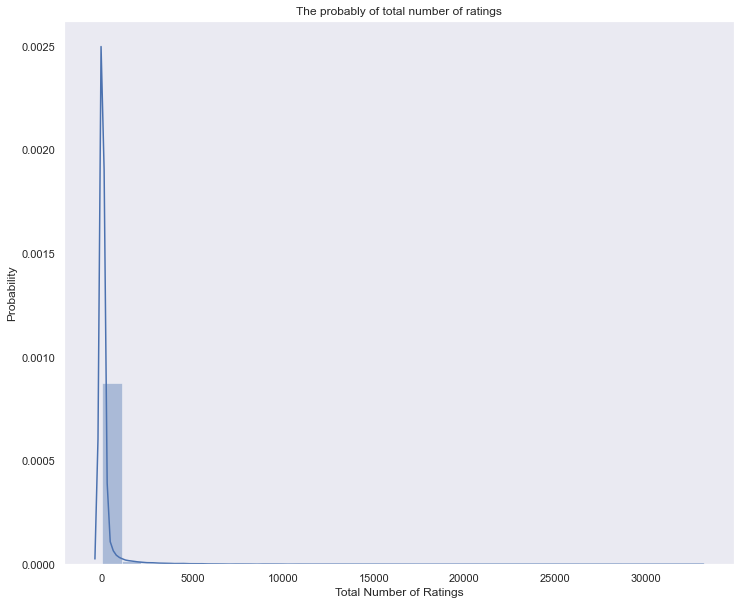

In [60]:
# Bar plot showing the total number of ratings
plt.figure(figsize = (12, 10))
sns.distplot(df_ratings['total ratings'],bins = 30)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.title('The probably of total number of ratings')
plt.show()

<p> The majority of the movies have less than a 5000 ratings, the number of movies having more than 5000 ratings is very low.</p>

### Highly Rated Movies

In [61]:
df_ratings.sort_values('mean rating', ascending = False).head(10)

,mean rating,total ratings
title,,
Which Way Home (2009),5.0,1
Kaakha Kaakha (2003),5.0,1
Not Quite Human II (1989),5.0,1
Selling Isobel (2018),5.0,1
Sehar (2005),5.0,1
The Enchanted Sedan Chair (1905),5.0,1
K.G.F: Chapter 1 (2018),5.0,1
Hard Cash (2002),5.0,1
Everyone's Going to Die (2013),5.0,1


In [62]:
print('Total no of users that gave rating of 5.0 : ', len(df_ratings.loc[df_ratings['mean rating'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_ratings.loc[(df_ratings['mean rating'] == 5) & (df_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  964 

Total no of Individual users that gave rating of 5.0 :  935


<p> As you can see the total number of users rating a 5 is 964 and there are 935 of these raters only rated the movie once.</p>
<p> Therefore this can not be a good indicator while recommneding movies. As this factor only shows the preference of a single individual.</p> <p> A good recommendation system would be taking highly and heavily rated movies together</p>

### Join Plot of Mean Rating vs. Total Number of Ratings

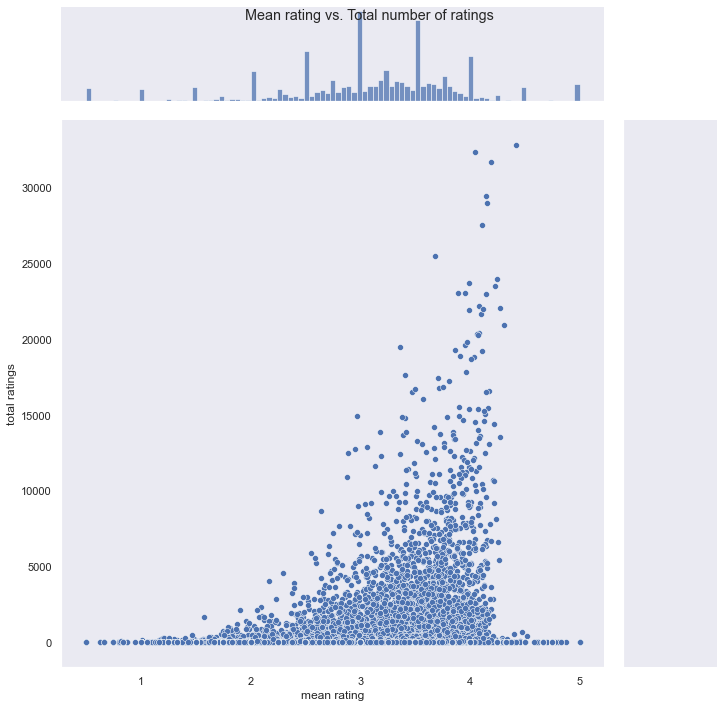

In [63]:
# A joint plot comparing both aspects
p = sns.jointplot(x = 'mean rating', y = 'total ratings', data = df_ratings, height = 10)
p.fig.suptitle('Mean rating vs. Total number of ratings')
plt.show()

<p> There is a huge density region corresponding to 0-5000 number of users rating and mean rating between 3-4.</p>

### Movies that recieved the least ratings

In [64]:
df_combined.groupby('title')['rating'].count().nsmallest(25)

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    1
#Female Pleasure (2018)                                    1
#Lucky Number (2015)                                       1
#Stuck (2014)                                              1
$1,000 on the Black (1966)                                 1
$uperthief: Inside America's Biggest Bank Score (2012)     1
'Master Harold'... and the Boys (1985)                     1
'Pimpernel' Smith (1941)                                   1
'Til Madness Do Us Part (2013)                             1
...ing (2003)                                              1
.hack Liminality In the Case of Kyoko Tohno                1
.hack Liminality: In the Case of Mai Minase                1
.hack//Beyond the World (2012)                             1
00 Schneider - Im Wendekreis der Eidechse (2013)           1
008: Operation Exterminate (1966)                          1
07/27/1978 (2017)                                          1
08/15 (1954)      

<p> This shows the unpopular movies get very low number of  ratings so it will be be harder to recommend these movies to other users as there is not enough historical data needed in order to predict.</p>

### Sex and Animations

Imagine a parent that doesn't assume all animated movies to be child-friendly. Such a parent is wise when considering the existence of animations such as "South Park" and "The Trailer Park Boys". If this parent were to have the data we do, the parent could check the relevance of adult tags for a particular animation before allowing their child to watch that animation.

In [65]:
genome_tags[genome_tags['tag']=='sex']

,tagId,tag
904,905,sex


In [66]:
movies[movies['title']=='Toy Story (1995)']['movieId']

0    1
Name: movieId, dtype: int64

In [67]:
genome_scores[np.logical_and(genome_scores['movieId']==1, genome_scores['tagId']==905)]

,movieId,tagId,relevance
904,1,905,0.025


The tag 'sex' has a 2.5% relevance to the animated movie 'Toy Story'. The paranoid parent can safely allow their young child to watch 'Toy Story'.

<a id = 'Recommend'></a><br>
# 4. Recommender Systems
[Back to table of Contents](#Table_Contents)

## What is a Recommender System

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries). <br> <br>
A recommender system seeks to estimate and predict user content preference regarding games, stories or videos. The system draws from data usage history, aiming at making suggestions based on the user’s (current) interests.  

In [68]:
Image(url= "https://www.bmsmain.com/wp-content/uploads/2018/06/Recommend.png",width = 800, height = 300)

## Types of Recomender Systems

<p> There will be two different apporaches used for the recommendation system, the approaches are:
    <ul><li> Content-Based filtering model</li>
    <li>Collaborative filtering model</li></ul></p>
    
<p> The idea behind content based (cognitive filtering) recommendation system is to recommend an item based on a comparison between the content of the items and a user profile. In simple words, the recommendations of a movie is based on the descriptions of other movies. </p>

<p> The theory behind collaborative filtering to work with collaboration with users or movie id. For example, there are two user A and B. User A likes movies P,Q,R,S and user B likes Q,R,S,T. Since movies Q, R and S are similar to both users, therefore movie P will be recommended to user B and movie T will be recommended to user A. </p>

In [69]:
Image(url= "https://miro.medium.com/max/700/1*mz9tzP1LjPBhmiWXeHyQkQ.png", width = 800, height = 300)

## Content Based Filtering

Content-based Filtering. Content-based filtering uses item features based on content to recommend other items similar to what the user likes, based on their previous actions or explicit feedback <br>

## Collabrative Based Filtering

Collaborative filtering filters information by using the interactions and data collected by the system from other users. It's based on the idea that people who agreed in their evaluation of certain items are likely to agree again in the future 

Lets use an example to understand collaborative filtering better. If person A enjoys 4 movies, The Matrix, Interstellar, Forrest Gump and Inception. Person B likes the movies, The Matrix, Interstellar, Forrest Gump and Fight Club. Person A and B almost have similar interests, therefore we can say with some certainty that A should like Fight Club and B should like Inception. The collaborative filtering algorithm uses 'User Behaviour' for recommeding items. This is one of the most widely used algorithm in the industry and is not dependent on additional information. There are different types of collaborating filtering techniques, the memory based and model based techniques will be used to make predictions. The memory based algorithm consists of User-based and Item-based collborative filtering and Model based uses a step to reduce or compress the large but sparse user-item matrix. One of the methods used to reduce the dimensions is called matrix factorization. If the matrix is mostly empty then reducing it can improve the models performance.

<a id="seven"></a>
# 5. Feature Engineering
<a class="anchor" id="1.1"></a>
---
    
| ⚡ Description: Feature engineering ⚡ |
| :--------------------------- |
| In this section the data is processed further, creating new features - as identified in the EDA phase. |

<a id = 'Collab'></a><br>
# 6. Collaborative Based Filtering 
[Back to table of Contents](#Table_Contents)

## Data Preprocessing

Content-based approach requires a good amount of information of items' own features, rather than using users' interactions and feedbacks. For example, it can be movie attributes such as genre, year, director, actor etc., or textual content of articles that can extracted by applying Natural Language Processing. Collaborative Filtering, on the other hand, doesn’t need anything else except users’ historical preference on a set of items. Because it’s based on historical data, the core assumption here is that the users who have agreed in the past tend to also agree in the future. In terms of user preference, it usually expressed by two categories being explicit and implicit rating. <br>

<p>Based on how the two filtering methods works from what was mentioned above, there will be two data preprocessing methods to conduct each filter.</p>

In [70]:
#Find how many unqiue Ids there are with User Id and Movie Id, and the order it follows
User_unique = train['userId'].nunique()
movie_unique = train['movieId'].nunique()
print('The number of unique user IDs are: ',User_unique)
print('The number of unique movie IDs are:',movie_unique)

The number of unique user IDs are:  162541
The number of unique movie IDs are: 48213


<p> The user IDs go from 1 to 162451 with no missing numbers, the movie IDs are integers from 1 to 209171 therefore not all movie IDs appear since there are only 48213 movie IDs.There are only ~48k movies.

In [71]:
#Get movieId frequency
df_movies_count = pd.DataFrame(train.groupby('movieId').size(), columns=['Counts'])
df_movies_count.head()

,Counts
movieId,
1,23062
2,9654
3,4727
4,968
5,4648


Text(0, 0.5, 'Number of Ratings')

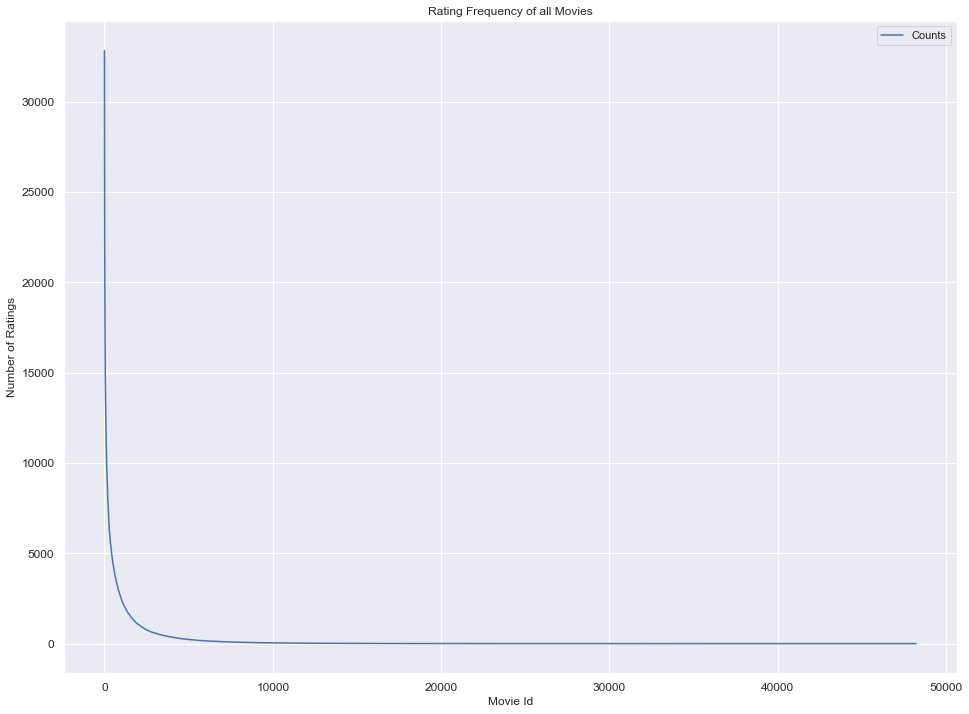

In [72]:
#Plot rating frequency of all movies
ax = df_movies_count.sort_values('Counts', ascending = False).reset_index(drop=True).plot(figsize=(med,small), 
                                                                                        title='Rating Frequency of all Movies',
                                                                                        fontsize = 12)
ax.grid()
ax.set_xlabel('Movie Id')
ax.set_ylabel('Number of Ratings')

<p>The distribution of ratings among movies often satisfies a property in real-world settings, which is referred to the long-tail property. According to this property, only a fraction of the items are rated frequently, these items are referred to as popular items as shown in the shaded blue area below. The majority of movies are rated rarely when assessing the graph as shown in the yellow shaded area below. This results in a highly skewed distribution of the underlying ratings. </p>

In [73]:
Image(url= "https://miro.medium.com/max/544/1*9V4i7s4ZxFHMxylZdd6KQg.png", width = 800, height = 300)

<p> Lets plot the same distribution but with a log scale to get a better understanding</p>

Text(0, 0.5, 'Number of Ratings')

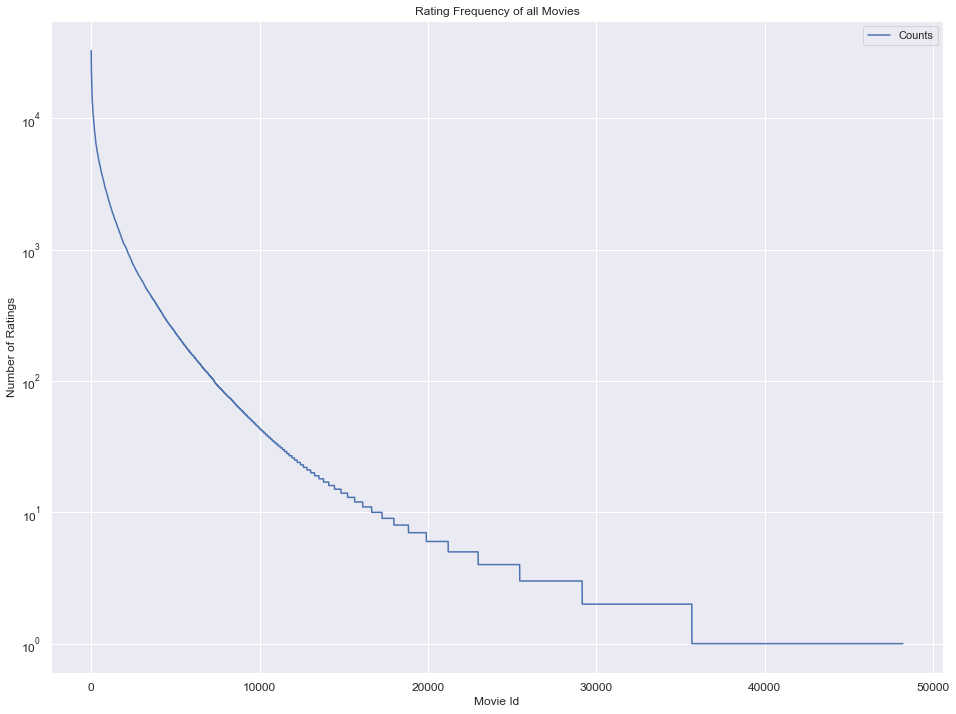

In [74]:
#Plot rating frequency of all movies
ax = df_movies_count.sort_values('Counts', ascending = False).reset_index(drop=True).plot(figsize=(med,small), 
                                                                                        title='Rating Frequency of all Movies',
                                                                                        fontsize = 12,
                                                                                         logy=True)
ax.grid()
ax.set_xlabel('Movie Id')
ax.set_ylabel('Number of Ratings')

<p> We can that roughly 8000 out of 48213 movies are rated more than 100 times. What is more fascinating is that roughly 1800 out of 48213 movies are rated less than, only 10 times. Lets analyse further by displaying top quantiles of rating counts. </p> 

In [75]:
#Top quantiles of rating counts
df_movies_count.quantile(np.arange(1, 0.6, -0.05))

,Counts
1.00,32831.0
0.95,813.8
0.90,252.0
0.85,103.0
0.80,49.0
0.75,26.0
0.70,15.0
0.65,10.0


So around 1% of the movies have roughly 32831 or more ratings, 5% of the movies has 814 ratings or more, and 20% of movies has 50 or more ratings. Since there are so many movies, we will limit the movies to top 25%. This gives us about 12100 movies. There are two reasons for doing this, firstly, we won't run into memory issue during model training and improve KNN perfromance since movies that are more unknown have ratings from fewer viewers, hence chance of the pattern being more noisy. Droping out less known movies can improve recommendation quality.</p>

In [76]:
# Dropping out 75% of the movies
popularity_theshold = 30
movies_popular = list(set(df_movies_count.query('Counts >= @popularity_theshold').index))
df_train_movies_dropped = train[train.movieId.isin(movies_popular)]
print('Shape of original train set: ', train.shape)
print('Shape of train set after dropping unpopular movies: ',df_train_movies_dropped.shape)

Shape of original train set:  (10000038, 4)
Shape of train set after dropping unpopular movies:  (9818406, 4)


In [77]:
# get number of ratings given by a user
df_user_count = pd.DataFrame(train.groupby('userId').size(), columns =[ 'Counts'])
df_user_count.head()

,Counts
userId,
1,28
2,72
3,251
4,89
5,35


Text(0, 0.5, 'Number of Ratings')

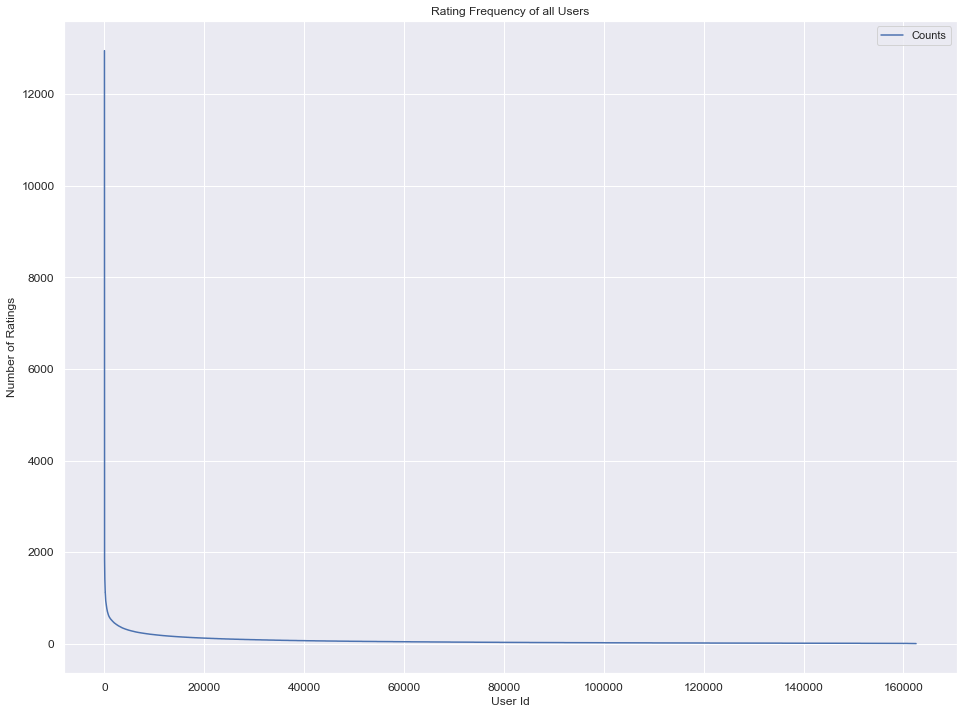

In [78]:
# Plotting rating frequency of all users
ax = df_user_count.sort_values('Counts', ascending = False).reset_index(drop=True).plot(figsize=(med,small), 
                                                                                        title='Rating Frequency of all Users',
                                                                                        fontsize = 12)
ax.grid()
ax.set_xlabel('User Id')
ax.set_ylabel('Number of Ratings')

In [79]:
df_user_count['Counts'].quantile(np.arange(1, 0.5, -0.05))

1.00    12952.0
0.95    222.0  
0.90    142.0  
0.85    104.0  
0.80    81.0   
0.75    65.0   
0.70    54.0   
0.65    45.0   
0.60    39.0   
0.55    33.0   
Name: Counts, dtype: float64

<p> We can see that the distribution of ratings by users is very similar to the distribution of ratings among movies. They both have long-tail property. Only a fraction of the users are very actively engaged with rating movies they watched. Most of the users are not interested in rating movies. So we can limit users to top 30%, which is around 48000 users. 

In [80]:
# Dropping out 70% of the users
popularity_theshold = 55
popular_users = list(set(df_user_count.query('Counts >= @popularity_theshold').index))
df_train = df_train_movies_dropped[df_train_movies_dropped.userId.isin(popular_users)]
print('Shape of original train set: ', train.shape)
print('Shape of train set after dropping unpopular movies: ',df_train.shape)

Shape of original train set:  (10000038, 4)
Shape of train set after dropping unpopular movies:  (7273215, 4)


In [81]:
#Find how many unqiue Ids there are with User Id and Movie Id, and the order it follows
User_unique = df_train['userId'].nunique()
movie_unique = df_train['movieId'].nunique()
print('The number of unique user IDs are: ',User_unique)
print('The number of unique movie IDs are:',movie_unique)

The number of unique user IDs are:  48123
The number of unique movie IDs are: 11488


In [82]:
#Save preprocessed dataframe to use for later
df_train.to_csv('edited_train.csv', index=False)

### Creating a smaller dataset to work with

<p>It is important to take the most important information from the data as only a much smaller sample will be used to test the collaborative filtering techniques. This will give us a better understanding on how the algorithm works, and if it will be a good perdictor for the larger dataset.</p> 

In [83]:
#counting number of users and how many times each one rated
user_id_counts = Counter(df_train.userId)

#counting number of movie appearances
movie_id_counts = Counter(df_train.movieId)

In [84]:
#number movies and users we would like to keep
n_users = 2000
n_movies = 500

In [85]:
# find most common IDs to use in smaller dataset
user_ids = [u for u,c in user_id_counts.most_common(n_users)]
movie_ids = [m for m,c in movie_id_counts.most_common(n_movies)]

In [86]:
# make a copy otherwise IDs won't be over written
train_small = train[train.userId.isin(user_ids) & train.movieId.isin(movie_ids)]

In [87]:
print('small dataframe size: ', len(train_small))

small dataframe size:  278526


## Predicting The Ratings

### User-User Collaborative Filtering

<p> This algorithm first finds the similarity score between users. Based on the similarity score, it then picks out the most similar users and recommends a which these users liked or bought previously. In our case, this algorithm finds the similarity between each user based on the ratings they have previously given to different movies. The prediction of an item for a user u is calculated by computing the weighted sum of the user ratings given by other users to an item i.</p>
<p> The prediction P(u,i)is given by:</p>

$$
\large P(u,i) = \frac {\sum \limits_{v=1}^{N} (R(v,i)) (S(u,v))}{\sum \limits_{v=1}^{N} S(u,v)}
$$

<p><ul><li>P(u,i) is the prediction</li>
    <li>R(v,i) is the rating given by a user v to a movie i</li>
    <li>S(u,v) is the similarity between users</li></ul></p>

In [88]:
#drop timestamp
train_small = train_small.drop(['timestamp'],axis = 1)

In [89]:
#Load data for surprise package
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train_small[['userId','movieId','rating']], reader)

#split the data first 
training_dataset,test_dataset = train_test_split(data, test_size=0.2, random_state=42)

# To use user-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between users
}
algo = KNNWithMeans(sim_options=sim_options, random_state = 42)

#Create a model
algo.fit(training_dataset)

#Prediction 
predictions = algo.test(test_dataset)

# Evaluation
RMSE = accuracy.rmse(predictions)
MAE_user = accuracy.mae(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8033
MAE:  0.6125


### Item-Item Collaborative Filtering

<p>In this algorithm, the similarity calculated is between each pair of items. Therefore based on the similarity between each movie, the algorithm will recommend similar movies which are liked by the users in the past. Instead of taking the weighted sum of ratings of 'User Neighbours', the algorithm takes the weighted sum of ratings of 'Item Neighbours'</p>
<p> The prediction P(u,i) is given by:</p>

$$
\large P(u,i) = \frac {\sum \limits_{N=1} (R(u,N)) (S(u,N))}{\sum \limits_{N=1} |S(i,N)|}
$$

In [90]:
# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo_item = KNNWithMeans(sim_options=sim_options, random_state = 42)

#Create a model
algo_item.fit(training_dataset)

#Prediction
prediction_items = algo_item.test(test_dataset)

# Evaluation
RMSE_item = accuracy.rmse(prediction_items)
MAE_item = accuracy.mae(prediction_items)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7966
MAE:  0.6046


### Matrix factorization Algorithm

<p>The algorithm works by decomposing the user-item matrix into two matrcies, A technique to do this is called Singular Value Decomposition (SVD), this mehtod comes from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. The SVD decreases dimension by extracting the latent factors</p>
<p>If M is a user - movie matrix, SVD decomposes it into 3 parts: M = UZV^T, where U is user concept matrix, Z is weights of different concepts and V is concept movie matrix. Simply put, SVD is equivalent to PCA after mean centering, i.e. shifting all data points so that their mean is on the origin</p>


In [91]:
#Model
algo_svd = SVD(random_state = 42)
algo_svd.fit(training_dataset)

#Predict
prediction_svd = algo_svd.test(test_dataset)

# Evaluation
RMSE_svd = accuracy.rmse(prediction_svd)
MAE_svd = accuracy.mae(prediction_svd)

RMSE: 0.7875
MAE:  0.5976


## Evaluation

<AxesSubplot:title={'center':'Evaluation of RMSE and MAE for each model'}, xlabel='Models'>

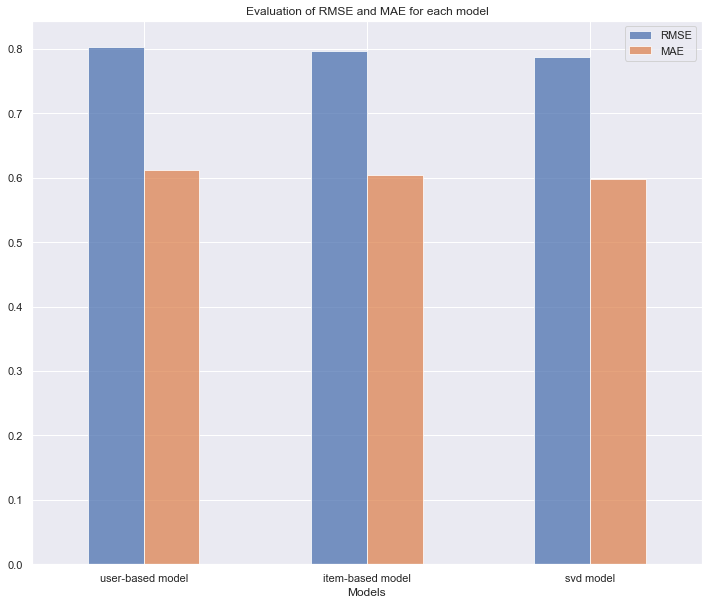

In [92]:
#Create and plot dataframe
df_evaluation = pd.DataFrame({'user-based model':[RMSE,MAE_user], 'item-based model':[RMSE_item,MAE_item], 'svd model':[RMSE_svd,MAE_svd]}, index = ['RMSE','MAE']).T
df_evaluation.reset_index(inplace = True)
df_evaluation.rename(columns = {'index':'Models'},inplace = True)
df_evaluation.plot(kind = 'bar', x = 'Models', y = ['RMSE','MAE'], title = 'Evaluation of RMSE and MAE for each model', 
                   figsize = (12,10), alpha=0.75, rot=0, grid = True, legend = True)

<p> From analysing the small data set it shows that item-based collaborative filtering performs better than the user-based algorithm. The matrix factorization algorithm performed the best with a rmse score of 0.78 and a mae score of 0.59, showing that the reduction in the user-item matrix does lead to a better performance with subset of data used. We will use the matrix factorization algorithms to analyse the big data and make rating predictions. </p>

## Recommend Similar Movies Based on Movie Choice

### Similarity methods

<p>k Nearest Neighbor algorithm is a very basic common approach for implementing the recommendation system. In k Nearest Neighbors, we try to find the most similar k number of items as nearest neighbors to a given item, and then recommend movies according to the information of the selected neighbors.</p>

<p> First, Euclidean Distance is the ordinary straight line distance between two points in Euclidean Space. If the dimension is two, the distance is just between two points in xy plane space.</p>

<p> On the other hand, Cosine Similarity Cosine based similarities. In cosine-based similarity an item  is represented as a vector in the  user-space. The angle between the vectors are computed and the cosine of the angle is the similarity of the items. </p>


In [93]:
recommendation_df = pd.merge(df_train, movies, on = 'movieId', how = 'left')
recommendation_df

,userId,movieId,rating,timestamp,title,genres,Genre_Cat
0,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,[Comedy]
1,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime,"[Adventure, Comedy, Crime]"
2,19630,62049,4.0,1246729817,1984 (1956),Drama|Sci-Fi,"[Drama, Sci-Fi]"
3,21066,2282,1.0,945785907,Pecker (1998),Comedy|Drama,"[Comedy, Drama]"
4,144018,1997,5.0,1109967647,"Exorcist, The (1973)",Horror|Mystery,"[Horror, Mystery]"
...,...,...,...,...,...,...,...
7273210,134451,1298,4.0,1060633971,Pink Floyd: The Wall (1982),Drama|Musical,"[Drama, Musical]"
7273211,140078,553,3.0,1002580977,Tombstone (1993),Action|Drama|Western,"[Action, Drama, Western]"
7273212,154807,56782,4.0,1227674807,There Will Be Blood (2007),Drama|Western,"[Drama, Western]"
7273213,85805,327,4.0,1479921530,Tank Girl (1995),Action|Comedy|Sci-Fi,"[Action, Comedy, Sci-Fi]"


In [95]:
# pivot ratings into movie features
df_movie_features = recommendation_df.pivot(index='movieId',columns='userId',values='rating').fillna(0)
mat_movie_features = csr_matrix(df_movie_features.values)
df_movie_features.head()

userId,2,3,4,8,9,12,13,18,19,23,...,162515,162516,162519,162521,162524,162529,162533,162534,162538,162541
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.5,0.0,...,0.0,2.5,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# create mapper from movie title to index
title_to_movieid = {movie: i for i, movie in enumerate(list(movies.set_index('movieId').loc[df_movie_features.index].title))}

In [97]:
#make an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

# fit the dataset
model = model_knn.fit(mat_movie_features)

In [98]:
def fuzzy_match(fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. 
    
    Parameters
    ----------    
    fav_movie: str, name of user input movie
    verbose: bool, print log if True
    
    
    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in title_to_movieid.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]


In [99]:
def recommendations(fav_movie, n_recommendations):
    '''
     return top n similar movies recommended to the users choice of favourite movie
     
     Parameters
     ------------------
     fav_movie: str, saves favourite movie for recommendation
     n_recommendations: int, top n recommendations
     
     
     Return
     -------------------
     list of top movies recommended to user
    
    ''' 
    # get input movie index
    print('The movie you want to recommend: ', fav_movie)
    idx = fuzzy_match(fav_movie, verbose = True)
    #Finding the neighbours
    distances, indices = model_knn.kneighbors(mat_movie_features[idx], n_neighbors=n_recommendations+1)
    recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]                  
    #get reverse mapper
    movieid_to_title = {v: k for k,v in title_to_movieid.items()}
    #Print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx,dist) in enumerate(recommends):
                        print('{0}: {1}, with distance of {2}'.format(i+1, movieid_to_title[idx], dist))  

In [100]:
#Choose a movie for recommendation
fav = 'iron man'
recommendations(fav,10)

The movie you want to recommend:  iron man
Found possible matches in our database: ['Iron Man (2008)', 'Iron Man 3 (2013)', 'Iron Man 2 (2010)']

Recommendations for iron man:
1: Sherlock Holmes (2009), with distance of 0.734826884226163
2: Dark Knight Rises, The (2012), with distance of 0.7346252644688778
3: WALL·E (2008), with distance of 0.721016230046744
4: Iron Man 2 (2010), with distance of 0.7183126349008406
5: Inception (2010), with distance of 0.7148142189598785
6: Avatar (2009), with distance of 0.7135067670517159
7: Star Trek (2009), with distance of 0.712433640509063
8: Batman Begins (2005), with distance of 0.7119159090195211
9: Avengers, The (2012), with distance of 0.710894099326802
10: Dark Knight, The (2008), with distance of 0.6842615026820746


<p> The recommendation system shows sherlock holmes and the Dark Knight Rises being the top recommendations for Iron Man, both these recommnendations display signs of action movies and a hero, this is also shown in the movie iron man. The downside is that all these movies recommended are really popular and have high volumes of ratings. Therefore a new movie might be a good recommendation for iron man but could be overlooked by this recommendation model due to fewer ratings provided by users, which shows how a cold-start of an item will be hard to recommend until more information is gained on new movie over time.</p>

## Amount of Sparsity in Matrix

In [101]:
non_zeroes = df_movie_features.astype(bool).sum(axis=1).sum()
row,col = df_movie_features.shape
percent_ratings = (non_zeroes / (row*col))
sparse_percent = 1 - percent_ratings
print('The amount of sparsity in cleaned data is: ', round(sparse_percent*100,2),'%')

The amount of sparsity in cleaned data is:  98.68 %


<p> Memory based methods work on two dimensional matrices of U users who have rated a number of items I. An important problem in gaining predictions using the memory based recommended system is the fact that most of the users only rate a very small proportion of items. This is known as the sparsity problem, and as you can see, there is about 98% sparsity in the user-item matrix which means that there are many users who have rated very few items. This leads to two negative impacts: firstly, the set of similar users does not match the preferences of the recommneded users. Secondly, it not easy to recommend items to users , as you are not likely to find enough kneighbourhoods who have rated the same items positively.</p>

<a id = 'Content'></a><br>
# 7. Content Based Filtering
[Back to table of Contents](#Table_Contents)

Content-based recommendation systems come with pros and cons. When making predictions for how a new user would rate a movie, content-based filtering does not suffer from the cold-start problem. Because recommendations from content-based recommendation systems are independent of users and based only on content (items), the same content is recommended for every user with the assumption that all users like similar content. This assumption, we feel, holds true far too seldom. 

<p> This type of filter will simply recommend items with similar content. This system uses item metadata, such as genres, director, description , actors, etc. for movies, to make these recommendations. The genral idea behind this algorithm is if a certain person likes a particular movie, he or she will like movies with similar content to the that particular movie. To recommend that, it will make use of users past item metadata.</p>

## Data Preprocessing

<p> It is important to try add as much content information as possible in order to give the content based as much informationm possible about the movie. From analyzing the data, it seems that the genre will be added as well as the tags, as there is sufficient information in those two dataframes</p>

In [102]:
#creating new column
movies['Genre_Cat'] = movies['genres'].str.split('|')
movies['genre features'] = movies['Genre_Cat'].apply(lambda x: ','.join(map(str,x)))
movies

,movieId,title,genres,Genre_Cat,genre features
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]","Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]","Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]","Comedy,Romance"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]","Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],Comedy
...,...,...,...,...,...
62418,209157,We (2018),Drama,[Drama],Drama
62419,209159,Window of the Soul (2001),Documentary,[Documentary],Documentary
62420,209163,Bad Poems (2018),Comedy|Drama,"[Comedy, Drama]","Comedy,Drama"
62421,209169,A Girl Thing (2001),(no genres listed),[(no genres listed)],(no genres listed)


In [103]:
#replacing commas with spaces
movies['genre features'] = movies['genre features'].str.replace(',',' ')

In [104]:
#drop timestamp
tags.drop(['timestamp'], axis = 1, inplace = True)

In [105]:
# get all tags put in to same row as movieId
tags_grouped = tags.groupby('movieId')['tag'].apply(list)
tags_grouped = pd.DataFrame(tags_grouped)

#creating new column
tags_grouped['tag features'] = tags_grouped['tag'].apply(lambda x: ','.join(map(str,x)))

#replacing commas with spaces
tags_grouped['tag features'] = tags_grouped['tag features'].str.replace(',',' ')

In [106]:
all_content = pd.merge(movies, tags_grouped, on = 'movieId', how = 'left')
all_content
all_content.dropna(inplace = True)
all_content['content'] = (all_content['genre features'] + ' ' + all_content['tag features'] + ' ' )
all_content.drop(['title','genres', 'Genre_Cat', 'genre features', 'tag features', 'tag'], axis = 1, inplace = True)

In [107]:
#remove digits and other symbols
def remove_patterns(df,column):
    '''
    Removing the the patterns from the content
    
    Parameters
    ----------
    df: data frame
        Input a dataframe
    column: String
        name of column from data frame
        
    Output
    ----------
    output: df
            Returns a dataframe with only letters from a-z
    
    '''    
    
    
    df_char = df[column].apply(lambda x:  re.sub(r'[^a-zA-Z ]', '', x))
    return df_char
all_content['tidy_content'] = remove_patterns(all_content,'content')

In [108]:
def remove_capital_words(df,column):
    '''
    Removing the capital words from content
    
    Parameters
    ----------
    df: data frame
        Input a dataframe
    column: String
        name of column from data frame
        
    Output
    ----------
    output: df
            Returns a words with no capitals
    
    '''    
    
    df_Lower = df[column].map(lambda x: x.lower())
    return df_Lower
all_content['tidy_content'] = remove_capital_words(all_content,'tidy_content')

In [109]:
#drop content
all_content.drop(['content'], axis = 1, inplace = True)

In [110]:
# Get Tokens of clean tweets
all_content['token'] = all_content['tidy_content'].apply(lambda x: x.split())

In [111]:
#remove stop words
stopwrds = stopwords.words('english')

In [112]:
# def remove_strop_words(df,column):
def remove_stopwords(df,column):
    '''
    Removing the stop words from the clean tweets
    
    Parameters
    ----------
    df: data frame
        Input a dataframe
    column: String
        name of column from data frame
        
    Output
    ----------
    output: df
            Returns a dataframe with no stopwords
    
    '''
    df_stopwords = df[column].apply(lambda x: [item for item in x if item not in stopwrds])
    return df_stopwords
all_content['token_rmv_stpwrd'] = remove_stopwords(all_content,'token')

In [113]:
#stemming
stemmer = PorterStemmer()
all_content['stemming'] = all_content['token_rmv_stpwrd'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [114]:
#Transform
def convert_st_str(df,column):
    '''
    Changes list of strings into one string per row in dataframe
    
    Parameters
    -----------
    df: data frame
        Takes  in a dataframe
        
    Output
    -----------
    output: df_str
            Returns a dataframe with a string instead of list for each row 
    '''
    df_str = df[column].apply(lambda x: ' '.join(x))
    return df_str
all_content['content based'] = convert_st_str(all_content,'stemming')

In [115]:
#drop columns
all_content.drop(['tidy_content','token','token_rmv_stpwrd','stemming'],axis = 1, inplace = True)
all_content.head()

movieId  \
0  1         
1  2         
2  3         
3  4         
4  5         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## Predicting The Ratings

In [116]:
#get ratings for predictions
train_content = df_train_movies_dropped.drop(['userId','timestamp'], axis = 1)

#find average rating
train_content = train_content.groupby('movieId').mean()

#merge average rating with content based information
content_based_df = pd.merge(train_content, all_content, on = 'movieId')

#seperate content based and rating in new dataframes
df_content_rating = content_based_df.drop('content based',axis = 1)
df_content = content_based_df.drop('rating',axis = 1)

#vertorize
vectorizer = TfidfVectorizer(analyzer='word')
tf_matrix = vectorizer.fit_transform(df_content['content based'])

#shape
tf_matrix.shape

(11398, 25688)

In [117]:
#get similarities
cosine_sim_content_based = cosine_similarity(tf_matrix)

In [118]:
#get prediction 
def predict_rating(movieid):
    '''
    Predict the rating based on the movieId using kneighbors and cosine similaritiesrrrrrrrrrdc
    
    Parameters
    ------------
    movieid: int
             The movie identification represented as an integer
    
    Return
    ------------
             The rating prediction of the movie id is returned using content based filtering
    
    '''
    model_rating = KNeighborsRegressor(n_neighbors=20)
    matrix = tf_matrix
    rating_mean = df_content_rating['rating'][:11488]
    model_rating.fit(matrix,rating_mean)
    index = content_based_df[content_based_df.movieId == movieid].index
    try:
        rating_predict = model_rating.predict(tf_matrix[index])
    except ValueError:
        rating_predict = [2.5] #np.mean(train[train['movieId']==movieid]['rating'])
    return rating_predict[0]

In [119]:
predict_rating(1) #Toy Story (1995)

3.6368850087215785

In [120]:
# making predictions
train[train['movieId']==1].groupby('movieId').mean()['rating'].iloc[0]

3.889970514265892

The rating prediction for Toy Story (1995) shows that the algorithm on content base predicted the movie rating fairly accurately. More movies would need to be tested to see understand how accurate the predicting algorithm is. Since the algorithm uses a lot of computational time, and taking a very small sub-sample will not show a true reflection of error. No further evaluation will be considered.

## Recommend Similar Movies Based on Movie Choice

In [121]:
# Prepare data
imdb.fillna('',inplace = True)

In [122]:
def data_preprocessing(subset_size):
    """Prepare data for use within Content filtering algorithm.

    Parameters
    ----------
    subset_size : int
        Number of movies to use within the algorithm.

    Returns
    -------
    Pandas Dataframe
        Subset of movies selected for content-based filtering.

    """
    
    # Subset of the data
    movies_subset = movies[:subset_size]
    return movies_subset

In [123]:
def content_model(movie_list,top_n=10):
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    recommended_movies = []
    data = data_preprocessing(27000)
    # Instantiating and generating the count matrix
    vectorizer = TfidfVectorizer(analyzer='word')
    tf_matrix = vectorizer.fit_transform(data['genre features'])
    titles = data['title']
    
    indices = pd.Series(data.index, index=data['title'])
    cosine_sim = cosine_similarity(tf_matrix, tf_matrix)
    # Getting the index of the movie that matches the title
    
    idx_1 = indices[movie_list[0]]
    idx_2 = indices[movie_list[1]]
    idx_3 = indices[movie_list[2]]
   
    
    
    rank1 = list(enumerate(cosine_sim[idx_1]))
    rank2 = list(enumerate(cosine_sim[idx_2]))
    rank3 = list(enumerate(cosine_sim[idx_3]))
    # Calculatirang the scores
    
    score_series_1 = sorted(rank1, key=lambda x: x[1], reverse=True)
    score_series_2 = sorted(rank2, key=lambda x: x[1], reverse=True)
    score_series_3 = sorted(rank2, key=lambda x: x[1], reverse=True)
    

    # Getting the indexes of the 10 most similar movies
    listings = score_series_1 + score_series_2 + score_series_3
    listings = sorted(listings, key=lambda x: x[1], reverse=True)

    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    sim_scores = listings[0:top_n]
    
    # Removing chosen movies
    movie_indices = [i[0] for i in sim_scores]
    recommended_movies = titles.iloc[movie_indices]
    return recommended_movies

In [124]:
#Movies
movie_list = ['Iron Man (2008)', 'Dark Knight, The (2008)', 'Avengers, The (2012)']

#Recommending with on content based
content_model(movie_list,top_n=10)

206     Waterworld (1995)                                    
257     Star Wars: Episode IV - A New Hope (1977)            
312     Stargate (1994)                                      
437     Demolition Man (1993)                                
1166    Star Wars: Episode V - The Empire Strikes Back (1980)
1179    Star Wars: Episode VI - Return of the Jedi (1983)    
1339    Star Trek III: The Search for Spock (1984)           
1654    Time Tracers (1995)                                  
1744    Lost in Space (1998)                                 
2004    Rocketeer, The (1991)                                
Name: title, dtype: object

In [125]:
movies[(movies['title'] == 'Iron Man (2008)') | (movies['title'] == 'Dark Knight, The (2008)') | \
       (movies['title'] == 'Avengers, The (2012)')][['title','genre features']]

,title,genre features
12221,"Dark Knight, The (2008)",Action Crime Drama IMAX
12324,Iron Man (2008),Action Adventure Sci-Fi
17067,"Avengers, The (2012)",Action Adventure Sci-Fi IMAX


In [126]:
movies[(movies['title'] == 'Waterworld (1995)') | \
       (movies['title'] == 'Star Wars: Episode IV - A New Hope (1977)') | \
       (movies['title'] == 'Stargate (1994)')][['title','genre features']]

,title,genre features
206,Waterworld (1995),Action Adventure Sci-Fi
257,Star Wars: Episode IV - A New Hope (1977),Action Adventure Sci-Fi
312,Stargate (1994),Action Adventure Sci-Fi


<p>The movies expected to be recommended were marvel or DC comics as these were in the movies list, however it recommended movies with the same genre as the movies chosen for recommendation, these were movies like 'Waterworld (1995)' and 'Star Wars: Episode IV - A New Hope (1977)', this can be seen above with the top-listed recommendation having very similar genres to the movie list. Therefore the recommendation system for content based works as expected, but I don't think it is a good algorithm to recommend movies based on content, as the user likes DC comics and Marvel but not like the science fiction movies recommended by the algorithm. When comparing the collaborative filtering algorithm, the system recommended 'Iron Man 2 (2010)', 'Avengers, The (2012)' and 'Dark Knight Rises, The (2012)' when getting recommendations on a marvel movie. Therefore recommending movies based on a user's ratings and the similar movies they liked, shows for more promising recommendation system than content based.</p>

<a id = 'Big_data'></a><br>
# 7. Big Data
[Back to Table of Contents](#Table_Contents)

<p>Recommendation systems has been a major topic for a couple of years and big companies like netflix and google use these systems as the algorithms suggest relevant information which the user typically desires from a vast number of choices. The main goal for the recommendation system is to predict or provide suggestions to users according to their previous history and the history of other users.</p>

<p>The algorithms used for the whole dataset was ALS (Alternating Least Squares) and SVD (Singular Value Decomposition), the reason is that both methods uses matrix factorization which is important as there was a lot of sparsity picked from analysing the dataset. This method reduces the dimensionality of the original user-item matrix into something much smaller that represents "all items by some taste dimensions" and "all users by some taste dimensions".</p> 

<p> The advantages of using ALS is the accuracy and the speed of training time over the traditional collaborative filtering algorithms. It is also an iterative optimization process where for every iteration, the algorithm tries to arrive closer and closer to a factorized representation of the original dataset. The algorithm for ALS works with having the original matrix R of size u x i with our users, items and some type of feedback data. In U and V we have weights for how each user/item relates to each feature. What we do is we calculate U and V so that their product approximates R as closely as possible: R ≈ U x V.
</p>

## Trial and Error

The cleaned data was originally used to make predictions for the whole test set, the rmse and mae error scores did improve locally when splitting the training set which made sense as there was no noise so the split training set had users that were also in split test set. However when these algorithms on the cleaned data for ALS and SVD were used to make predictions on the full test set, the scores on kaggle were around 0.86 and up. This meant working with the full dataset was better as it has more inormation on each user, which these types of algorithms need in order to get better rating predictions about each user.

## SVD

Surprise is a scikit building and analyzing recommender systems that deal with explicit rating data.
In the context of recommendation systems it is used as a collaborative filtering algorithm to predict ratings 
based on the reactions of similar users. Matrix Factorization techiques are employed which is more effective at discovering latent features and underlying interactions between users and items.
Gradient descent is then used to minimize the squared error between predicted rating and actual rating.

One percent of the data was randomly sampled to save on run time as well as computational expenses on AWS.

In [130]:
p = 0.01  # 1% of data
train_data= pd.read_csv(
         "train.csv",
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
test_data= pd.read_csv("test.csv")
sample_submission= pd.read_csv('sample_submission.csv')

In order to load a dataset from a pandas dataframe, we need the load_from_df method, we also need a Reader object with a rating_scale parameter. 
The rating_scale parameter is the range of ratings in our loaded data. The data is split into a train and test set.

In [131]:
d = {'ItemID':list(train_data.movieId), 'UserID':list(train_data.userId), 'Rating':list(train_data.rating)}
df = pd.DataFrame(d)
reader = Reader(rating_scale=(0.5,5.0))
Data = Dataset.load_from_df(df[['UserID','ItemID','Rating']],reader)

train, test = train_test_split(Data,test_size=0.25)
svd = SVD()
svd.fit(train)

The model is used to make predictions on the test set and an RMSE score is calculated.

In [132]:
svd.predict('UserID','ItemID')
predictions = svd.test(test)
SVD_RMSE = accuracy.rmse(predictions)

RMSE: 0.9784


The model has to be applied to each tuple in the test data (movieId and userId) in order to make predictions.

In [133]:
for i in test_data.itertuples():
    a=[]
    user= i.userId
    item= i.movieId
    predictions = svd.predict(user,item)
    a.append(predictions.est)

In [134]:
Sub = sample_submission[['Id']]
Sub['rating'] = pd.Series(a)
Sub['rating'].fillna(2.5, inplace=True)
Sub.to_csv("surprise.csv", index=False)

### Alternating Least Squares

pySpark's ALS (Alternating Least Squares) algorithm utilises matrix factorisation, factorising a matrix containing users, ratings and items (in our case the training data with the users, their rating and the movies) into two factors, a user matrix and an item matrix. The equation solved by the ALS algorithm is such that if either the user matrix or item matrix is fixed, a quadratic equation is attained, from which the the matrix not fixed can be calculated directly. In this case the item matrix will be fixed.

In [135]:
#showing the ALS algorithm and how it works
Image(url= "https://miro.medium.com/max/1000/1*ygHEXIhg5FtkSD3UQaldgw.png", width = 1000, height = 600)

In [136]:
#Prepare Data
train = spark.read.csv('train.csv', inferSchema=True, header=True)
test = spark.read.csv('test.csv', inferSchema=True, header=True)
train = train.drop('timestamp')

In [137]:
#Split Data
train_df, test_df = train.randomSplit([0.8,0.2], seed = 42)

In [138]:
#Train model
als =  ALS(maxIter=5, regParam=0.01, rank = 5, userCol="userId", itemCol="movieId", ratingCol="rating", seed=42)

model = als.fit(train_df)

In [139]:
# Make Predictions
predictions = model.transform(test_df)

In [140]:
### Summary of predictions
predictions.describe().show()

+-------+-----------------+------------------+------------------+----------+
|summary|           userId|           movieId|            rating|prediction|
+-------+-----------------+------------------+------------------+----------+
|  count|          1999248|           1999248|           1999248|   1999248|
|   mean|81199.12843729243|21384.792519487328|3.5331934807487615|       NaN|
| stddev|46764.68655118148| 39218.31248947409| 1.060999500788261|       NaN|
|    min|                1|                 1|               0.5|-14.072804|
|    max|           162541|            209171|               5.0|       NaN|
+-------+-----------------+------------------+------------------+----------+



When there are cold start users or items to make predictions on , the predictions will produce NaN as shown in the summary. This will cause an NaN when calculating the RMSE and MAE, therefore need to find a way to deal with NaN values. One way is to fill NaN values with the weighted average rating of the user.

In [141]:
# dealing with cold start by adding in the weighted average for ratings
predictions = predictions.na.fill(3.5)

In [142]:
# Evaluate RMSE
evaluator_rmse = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol="prediction")
rmse_als = evaluator_rmse.evaluate(predictions)

# Evaluate MAE
evaluator_mae = RegressionEvaluator(metricName='mae', labelCol='rating', predictionCol="prediction")
mae_als = evaluator_mae.evaluate(predictions)

print('RMSE: ', rmse_als)
print('MAE: ', mae_als)

RMSE:  0.8731124790772579
MAE:  0.6631957079821231


### Parameter Tuning

In [143]:
# model
als =  ALS(maxIter=20, regParam=0.05, rank = 5, userCol="userId", itemCol="movieId", ratingCol="rating", seed=42)
model = als.fit(train_df)

#predict
predictions_tuned = model.transform(test_df)

#fill na
predictions_tuned =  predictions_tuned.na.fill(3.5) 

#evaluate
rmse_tuned_als = evaluator_rmse.evaluate(predictions_tuned)
mae_tuned_als = evaluator_mae.evaluate(predictions_tuned)

print('RMSE: ', rmse_tuned_als)
print('MAE: ', mae_tuned_als)

RMSE:  0.8293442117291375
MAE:  0.6321574563427838


### Predicting The  Ratings

In [144]:
#Use best parameters for algorithm
als =  ALS(maxIter=20, regParam=0.05, rank=5, userCol="userId", itemCol="movieId", ratingCol="rating", seed=42)

#train best model
bestmodel = als.fit(train)

#Predict unseen test 
prediction_final = bestmodel.transform(test)

In [145]:
# Get count of nan or missing values in pyspark
prediction_final.select([count(when(isnan(c), c)).alias(c) for c in prediction_final.columns]).show()

+------+-------+----------+
|userId|movieId|prediction|
+------+-------+----------+
|     0|      0|      6383|
+------+-------+----------+



In [146]:
# make into dataframe
prediction_df = prediction_final.select("*").toPandas()

In [147]:
#sort for making a submission
prediction_df.sort_values(['userId', 'movieId'],inplace=True)

#fill na to make submission
prediction_df.fillna(value = 3.5,inplace = True)

prediction_df.head()

,userId,movieId,prediction
449551,1,2011,2.348682
63129,1,4144,4.261465
236580,1,5767,3.475179
133783,1,6711,4.178489
345014,1,7318,2.601543


In [148]:
# Prepare for submission
prediction_df['userId'] = prediction_df['userId'].astype(str)
prediction_df['movieId'] = prediction_df['movieId'].astype(str)
prediction_df['Id'] = prediction_df[['userId','movieId']].apply('_'.join, axis=1)

In [149]:
Submission_als = pd.DataFrame({"Id":prediction_df['Id'], 
                           "rating":prediction_df['prediction']})
Submission_als.to_csv("submission_als.csv", index=False)

In [150]:
Submission_als.head(10)

,Id,rating
449551,1_2011,2.348682
63129,1_4144,4.261465
236580,1_5767,3.475179
133783,1_6711,4.178489
345014,1_7318,2.601543
133784,1_8405,3.746708
73292,1_8786,3.738431
406476,2_150,3.766520
326308,2_356,3.985166
43832,2_497,3.204090


In [151]:
params = {"model": "ALS",
          "filtering": "collaborative",
          "rank": 10,
          "maxiIter": 10,
          "regParam": 0.1,
          "numUserBlocks": 10,
          "numItemBlocks": 10,
          "implicitPrefs": False,
          'alpha':1.0,
          'userCol':'userId',
          'itemCol':'movieId',
          'seed':None,
          'ratingCol':'rating',
          'nonnegative':False,
          'checkpointInterval':10,
          'intermediateStorageLevel':'MEMORY_AND_DISK',
          'finalStorageLevel':'MEMORY_AND_DISK',
          'coldStartStrategy':'nan',
          'blockSize':4096,
          }
experiment.log_parameters(params)

### Evaluation

In [152]:
experiment.log_metrics({'RMSE':0.81673})

<AxesSubplot:title={'center':'Evaluation of RMSE and MAE for each model'}, xlabel='Models'>

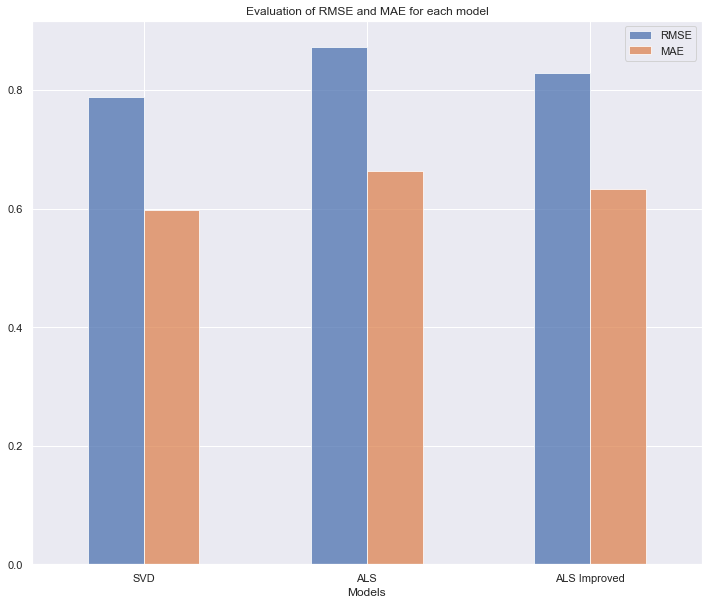

In [153]:
#Create and plot dataframe
df_evaluation_final = pd.DataFrame({'SVD':[RMSE_svd,MAE_svd], 'ALS':[rmse_als,mae_als], 'ALS Improved':[rmse_tuned_als,mae_tuned_als]}, index = ['RMSE','MAE']).T
df_evaluation_final.reset_index(inplace = True)
df_evaluation_final.rename(columns = {'index':'Models'},inplace = True)
df_evaluation_final.plot(kind = 'bar', x = 'Models', y = ['RMSE','MAE'], title = 'Evaluation of RMSE and MAE for each model', 
                   figsize = (12,10), alpha=0.75, rot=0, grid = True, legend = True)

This alternating least squares model, with this method of filling null values achieves an **RMSE score of 0.81673** on Kaggle.

<p> The best performing algorithm was ALS that has an  rmse score of 0.81673, the ALS algorithm cannot predict for users that have not been in the historical data, which could lead to huge affects on the gaining an increase in error. The SVD algorithm was unable to predict for users that weren't seen in the historical data. The big advantage to ALS was the amount of time it took to train a model and predict, if there was a way to deal with the cold start problem, it would have probably given more accurate results. Another point to mention, was the error decrease when the number of iterations increased for each algoithm. But there was no way to increase the number of iterations greatly as the computing time could not handle the complexity and large amount of data.</p>

<p> The recommendation system using the SVD model performed better than the KNN and the content based recommendation system, movie list had one DC comic and two Marvel movies (been consistant throughout to measure performance). The recommendation function has shown the top five movies, four of the movies are marvel related movies which proves that the system understood what that the user had an interest in marvel movies. 'Braveheart (1995)' was a movie not part of Marvel but does relate to a character being a hero in a historical fiction war movie, thus could make sense for being a recommendation. This recommender also shows diversity where five out of the ten movies are not marvel, wich allow users to explore different tastes and keeps user engaged with the recommended movies.</p>

<a id = 'con'></a><br>
# 9. Conclusion
[Back to Table of Contents](#Table_Contents)

<p> There were two sections to this predict and both sections had content based and collaborative filtering. The content based filtering showed good signs of predicting a rating but needed way more computing power to make predict ratings on massive dataset. Therefore was hard to evaluate if the predictor was accurate. The recommendation system used to recommend movies based on genres was exceptional at recommending similar movies based on the users preference. The system did not recommend one Marvel or DC comic movie which did not show good signs for being an outstanding recommendation system as the user showed interest in these types of movies, The system also couldn't take into account a larger scale of the dataset due to computional complexity, which makes it less likely to be accurate. The collaborative filter performed best with matrix factorization algorithm to make predictions on movies. This is due to the user-item matrix having 98.68% sparsity, which created more error in predicting a users rating for a specific movie. The ALS and SVD algotirthms were used to predict the ratings of the unseen data. The SVD model performed slightly better as the algorithm predicted for cold start users and movies. The ALS model could not predict for cold starts therefore a weighted average rating replaced the  NaNs which possibly caused more error. The advantage of ALS was the speed it took to make predictions. The long-tail graph distribution of ratings showed that there were definitely a few popular movies which had more ratings and majority of movies had very little ratings, the same was showed for users. A threshold was obtained which caused the predictions of ratings to perform worse. There was less information taken into account about each movie and user, therefore increased the cold-start problem. This made it harder for the algorithms to predict ratings. The whole dataset was used in order to gain accurate predictions on unseen dataset. The recommendation system managed to recommend DC comics and Marvel, based on the users preference for KNN and SVD approach. However, the SVD system was able to recommend more marvel movies which is what the user preferred with maintaining diversity. Overall the content based filter was difficult to implement on big data and the collaborative filter was easier to implement and gave better recommendations for a user based on preference.</p>

<p><b>What would be done differently next time</b></p>

<p> The use of metrics such as hit rate, coverage and diversity would be taken into account, this will help  evaluating how well the recommendation systems perform. Adjusting the threshold of the long-tail distribution so that movies that are not popular but fit users criteria could be recommended instead of just popular movies.</p>

In [157]:
experiment.end()
experiment.display()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/will-i-am18/unsupervised-learning-gm3/6e96b667ee54460fa0538b53d878ec23
COMET INFO:   Metrics:
COMET INFO:     RMSE : 0.81673
COMET INFO:   Parameters:
COMET INFO:     algorithm                : auto
COMET INFO:     alpha                    : 1.0
COMET INFO:     blockSize                : 4096
COMET INFO:     checkpointInterval       : 10
COMET INFO:     coldStartStrategy        : nan
COMET INFO:     filtering                : collaborative
COMET INFO:     finalStorageLevel        : MEMORY_AND_DISK
COMET INFO:     implicitPrefs            : False
COMET INFO:     intermediateStorageLevel : MEMORY_AND_DISK
COMET INFO:     itemCol                  : movieId
COMET INFO:     leaf_size                : 30
COMET INFO:     maxiIter                 : 10
CO